In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-air-quality-dataset/final_dataset.csv


In [59]:
df = pd.read_csv('/kaggle/input/delhi-air-quality-dataset/final_dataset.csv')
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Year', ylabel='PM2.5'>

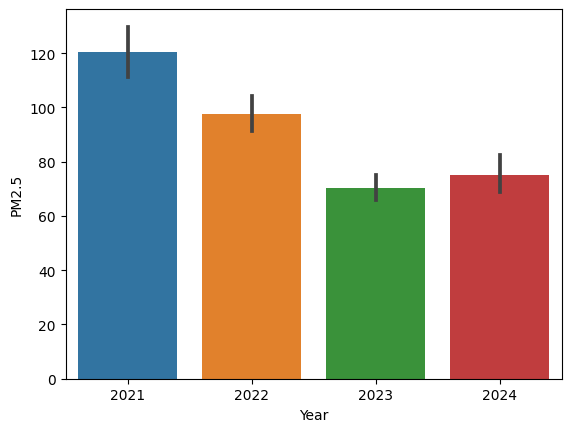

In [61]:
sns.barplot(x='Year', y = 'PM2.5', data = df)

<Axes: xlabel='Year', ylabel='PM10'>

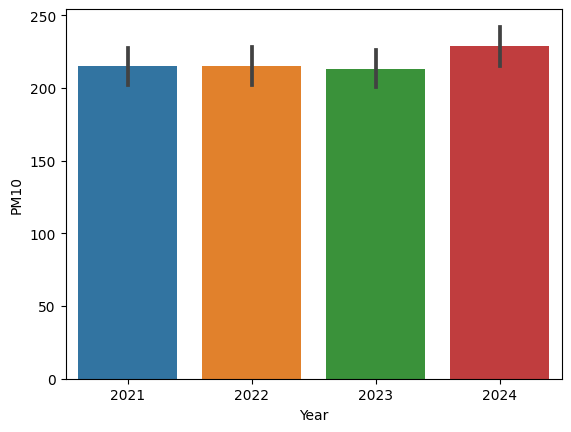

In [62]:
sns.barplot(x='Year', y = 'PM10', data = df)

In [63]:
df.shape

(1461, 12)

In [64]:
df.isnull().sum

<bound method DataFrame.sum of        Date  Month   Year  Holidays_Count   Days  PM2.5   PM10    NO2    SO2  \
0     False  False  False           False  False  False  False  False  False   
1     False  False  False           False  False  False  False  False  False   
2     False  False  False           False  False  False  False  False  False   
3     False  False  False           False  False  False  False  False  False   
4     False  False  False           False  False  False  False  False  False   
...     ...    ...    ...             ...    ...    ...    ...    ...    ...   
1456  False  False  False           False  False  False  False  False  False   
1457  False  False  False           False  False  False  False  False  False   
1458  False  False  False           False  False  False  False  False  False   
1459  False  False  False           False  False  False  False  False  False   
1460  False  False  False           False  False  False  False  False  False   

        

In [65]:
X = df.iloc[:, 0:10]
y = df['AQI']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
model = RandomForestRegressor(random_state=101)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=101)

In [70]:
y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are from your SVR model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 845.2373273348519
R-squared: 0.9315766138567024


In [72]:
import tensorflow as tf

2025-08-08 16:25:13.683366: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754670313.979830      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754670314.062039      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [75]:
classifier = Sequential()

In [76]:
classifier.add(Dense(units = 11, activation = 'relu', input_shape = (X_train.shape[1],)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-08 16:28:03.579028: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [77]:
classifier.add(Dense(units = 7, activation = 'relu'))

In [78]:
classifier.add(Dense(units = 10, activation = 'relu'))

In [80]:
classifier.add(Dense(1,activation = 'sigmoid'))

In [81]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])

In [82]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33, batch_size = 10, epochs = 100)
     

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 53116.4414 - mean_squared_error: 53116.4414 - val_loss: 48791.0000 - val_mean_squared_error: 48791.0000
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55570.0039 - mean_squared_error: 55570.0039 - val_loss: 48791.0000 - val_mean_squared_error: 48791.0000
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53826.4141 - mean_squared_error: 53826.4141 - val_loss: 48791.0000 - val_mean_squared_error: 48791.0000
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52673.2461 - mean_squared_error: 52673.2461 - val_loss: 48791.0000 - val_mean_squared_error: 48791.0000
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53008.2891 - mean_squared_error: 53008.2891 - val_loss: 48791.0000 - val_mean_squared_error: 48791.0000
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54940.2695 - mean_squared_error: 54940.2695 - val_loss: 48791.0000 - val_mean_squared_error: 48791.0000
Epoch 7/100
69/69 ━━━━